In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib
%matplotlib widget
matplotlib.rcParams['figure.figsize'] = [12, 5]

In [317]:
file_name = "sample_40"

In [318]:
df = pd.read_csv(f"dataset_slippage/raw/{file_name}.csv")

<Axes: xlabel='time'>

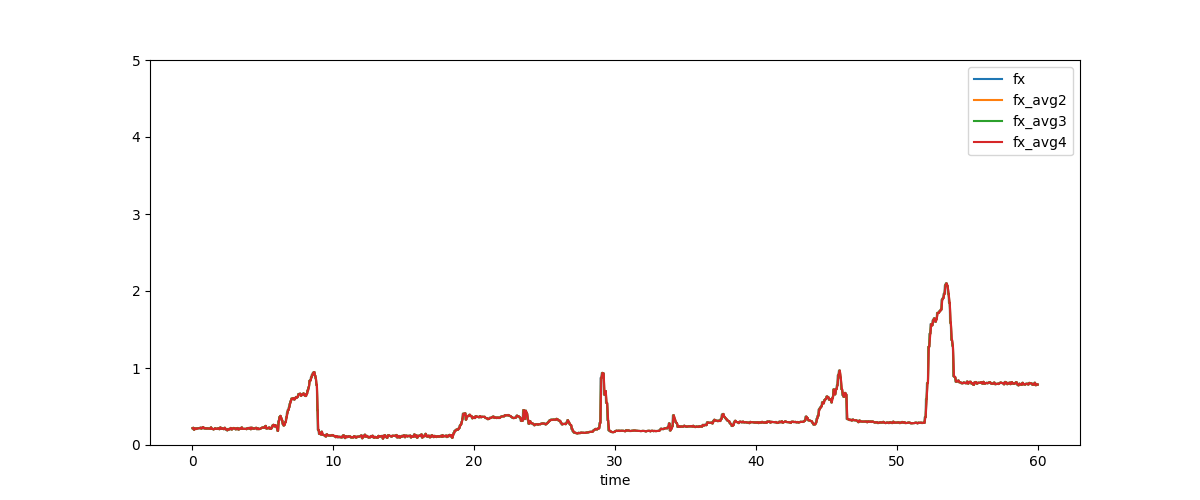

In [319]:
df[["fx", "fx_avg2", "fx_avg3", "fx_avg4", "time"]].plot(x="time", ylim=(0, 5))

<Axes: xlabel='time'>

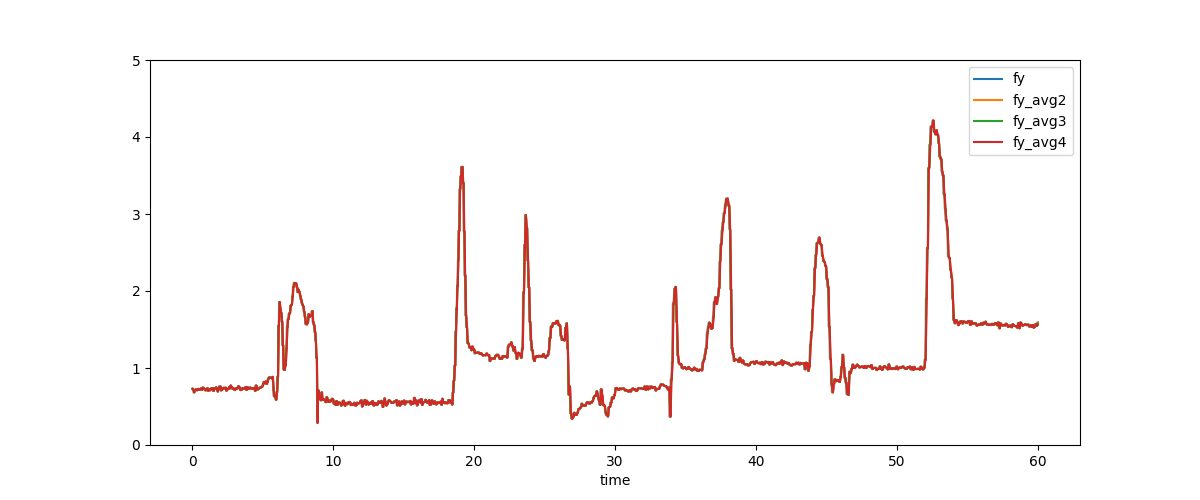

In [320]:
df[["fy", "fy_avg2", "fy_avg3", "fy_avg4", "time"]].plot(x="time", ylim=(0, 5))

<Axes: xlabel='time'>

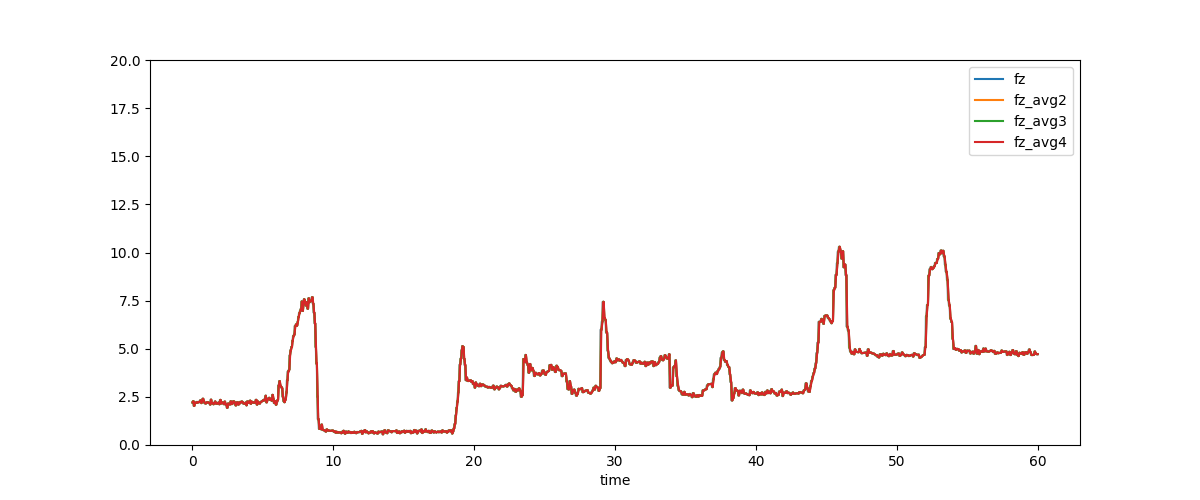

In [321]:
df[["fz", "fz_avg2", "fz_avg3", "fz_avg4", "time"]].plot(x="time", ylim=(0, 20))

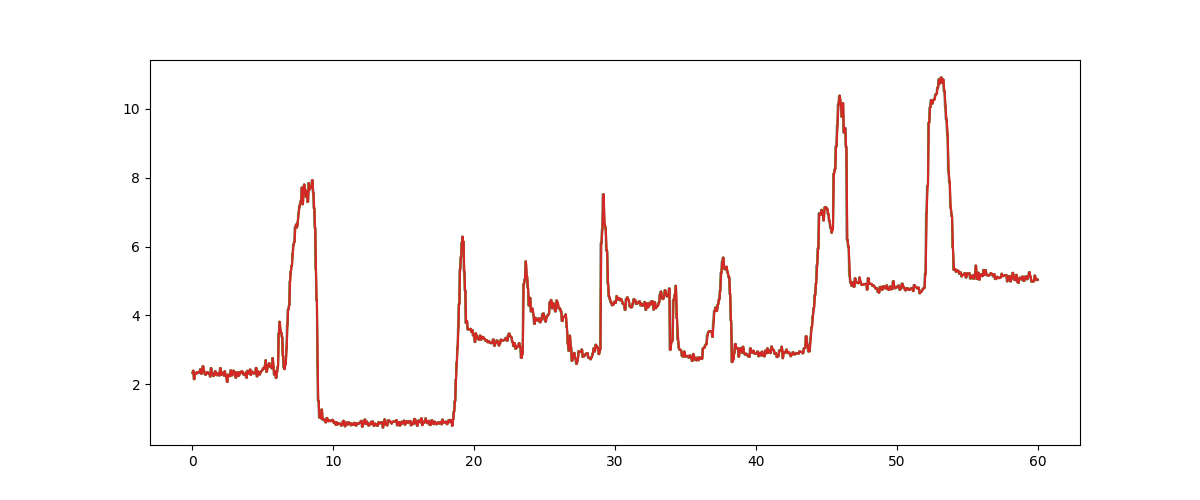

In [325]:
# Segments defined based on the magnitude plot
slipped_segments = []

def mouse_event(event):
    global slipped_segments
    print('x: {} and y: {}'.format(event.xdata, event.ydata))
    slipped_segments.append(event.xdata)

fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', mouse_event)
plt.plot(df["time"], df["mag"])
plt.plot(df["time"], df["mag_avg2"])
plt.plot(df["time"], df["mag_avg3"])
plt.plot(df["time"], df["mag_avg4"])


In [326]:
len(slipped_segments), slipped_segments

(18,
 [6.005697597144344,
  9.482479425101335,
  18.3518208229508,
  20.196643833703487,
  23.105787812198106,
  24.241063511122842,
  25.376339210047572,
  27.434026414348647,
  28.782166306821768,
  30.27221566166048,
  33.2523143713379,
  34.884273188542195,
  36.23241308101532,
  38.999647597144346,
  43.89552404875725,
  47.15944168316585,
  51.77149921004758,
  54.964462113273385])

# Select label intervals

In [327]:
# Everything is labeled static at the beginning
df["label"] = "static"
count_start = 0
count_end = 1 
for _ in range(int(len(slipped_segments)/2)):
    print(f"start: {slipped_segments[count_start]} \t end: {slipped_segments[count_end]}")
    start = slipped_segments[count_start]
    end = slipped_segments[count_end]
    count_start += 2
    count_end += 2
    df.loc[(df["time"] >= start) & (df["time"] <= end), "label"] = "slipped"

start: 6.005697597144344 	 end: 9.482479425101335
start: 18.3518208229508 	 end: 20.196643833703487
start: 23.105787812198106 	 end: 24.241063511122842
start: 25.376339210047572 	 end: 27.434026414348647
start: 28.782166306821768 	 end: 30.27221566166048
start: 33.2523143713379 	 end: 34.884273188542195
start: 36.23241308101532 	 end: 38.999647597144346
start: 43.89552404875725 	 end: 47.15944168316585
start: 51.77149921004758 	 end: 54.964462113273385


## Some data cleaning before saving the file

In [328]:
df = df.dropna()

## Insights on label counts

In [329]:
df["label"].value_counts()

label
static     2674
slipped    1363
Name: count, dtype: int64

## Save clean dataframe

In [330]:
selected_columns = ["time", "mag", "mag_avg2", "mag_avg3", "mag_avg4", "label"]

In [331]:
df[selected_columns].to_csv(f"dataset_slippage/clean/clean_{file_name}.csv", index=False)

## Visual Inspection of Final labels

In [332]:
#df = pd.read_csv("dataset_slippage/clean/clean_sample_25.csv")

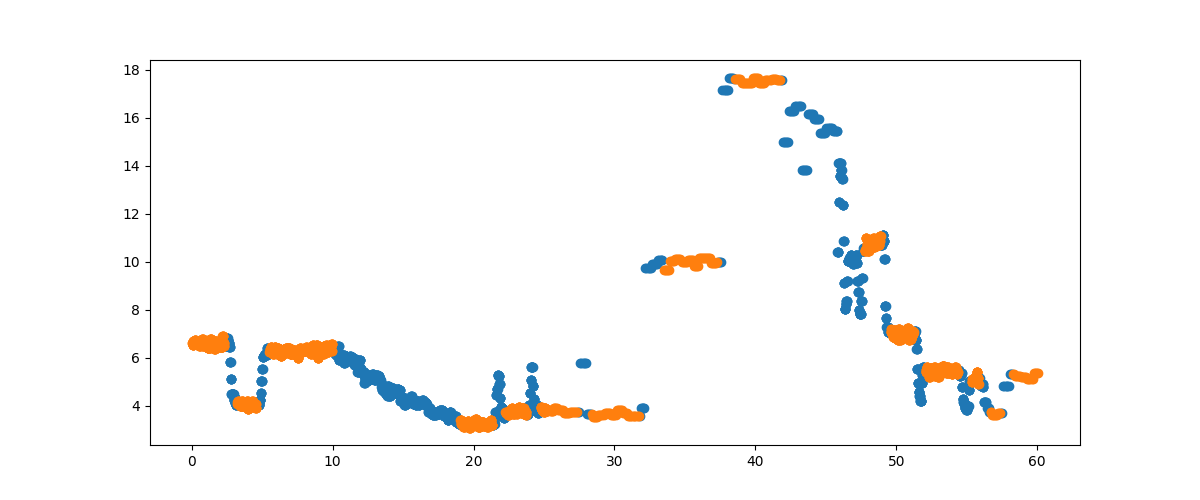

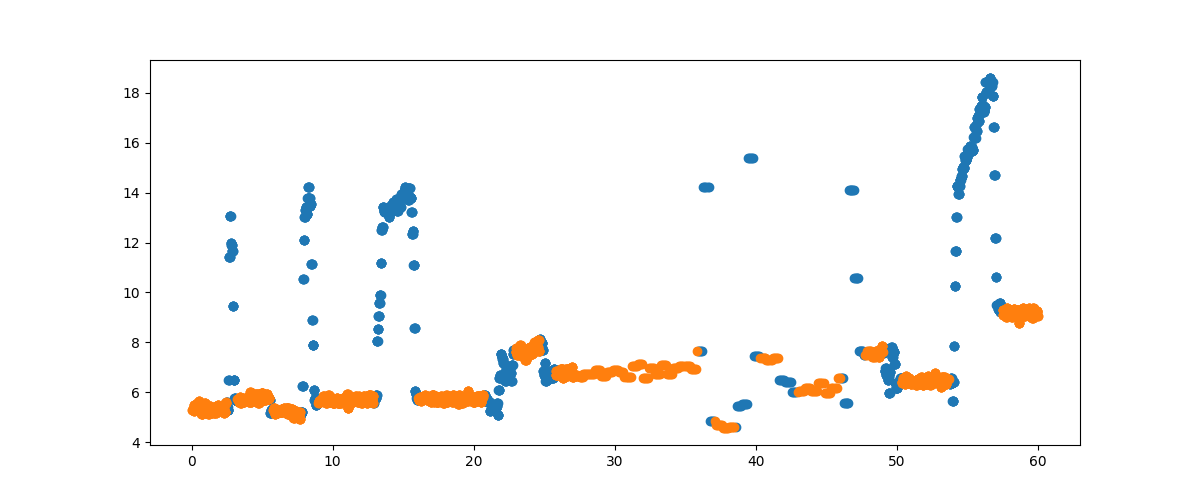

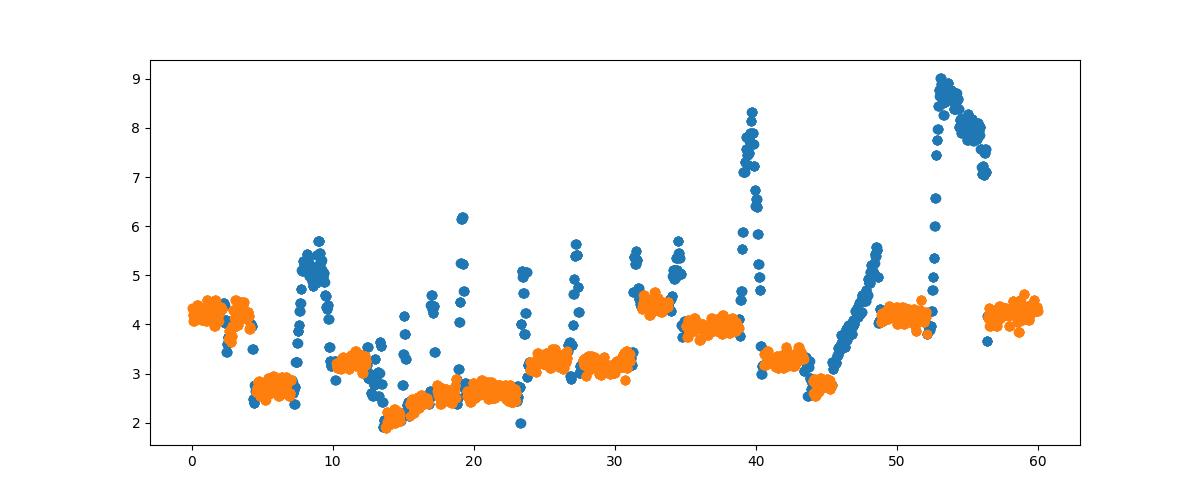

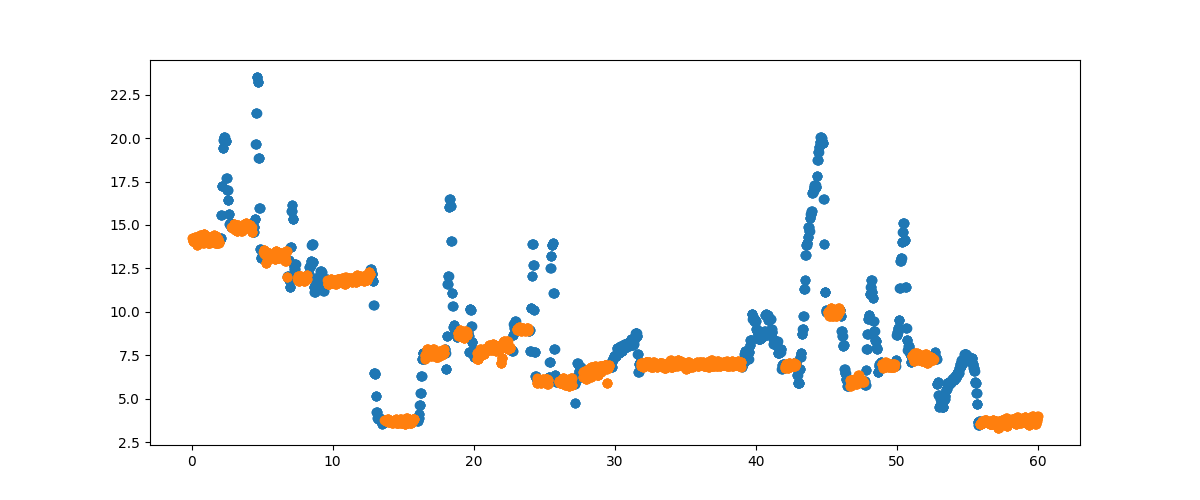

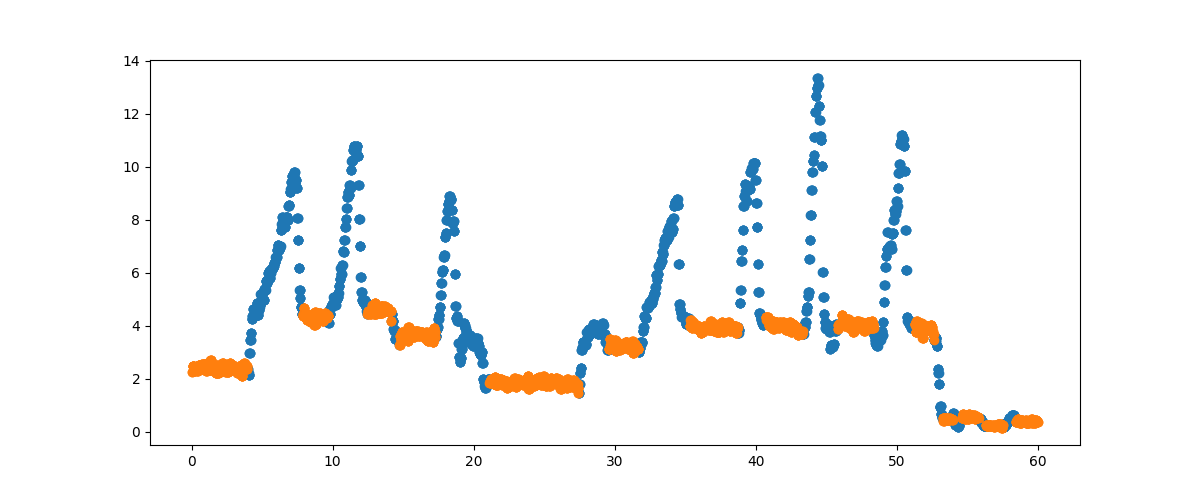

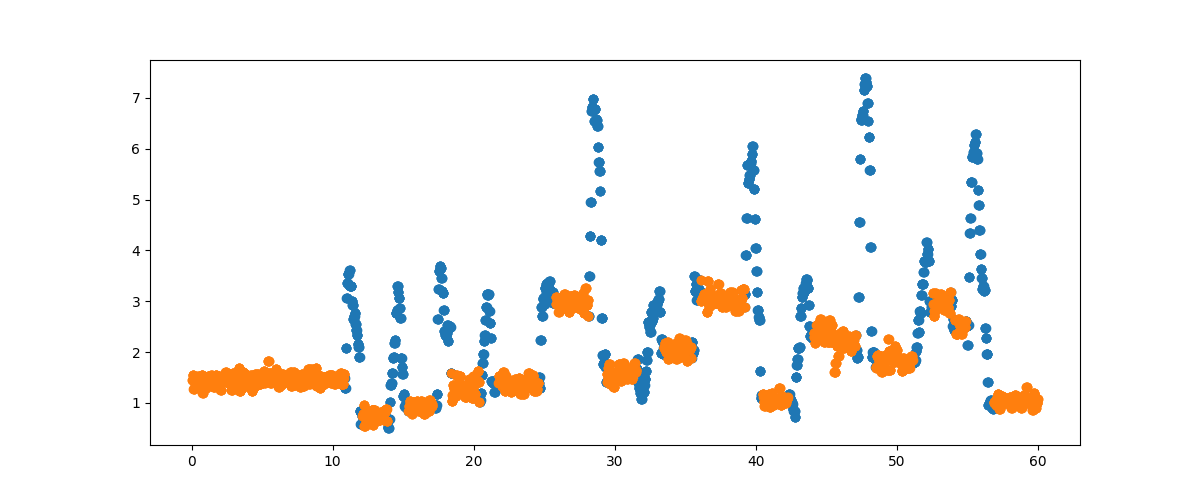

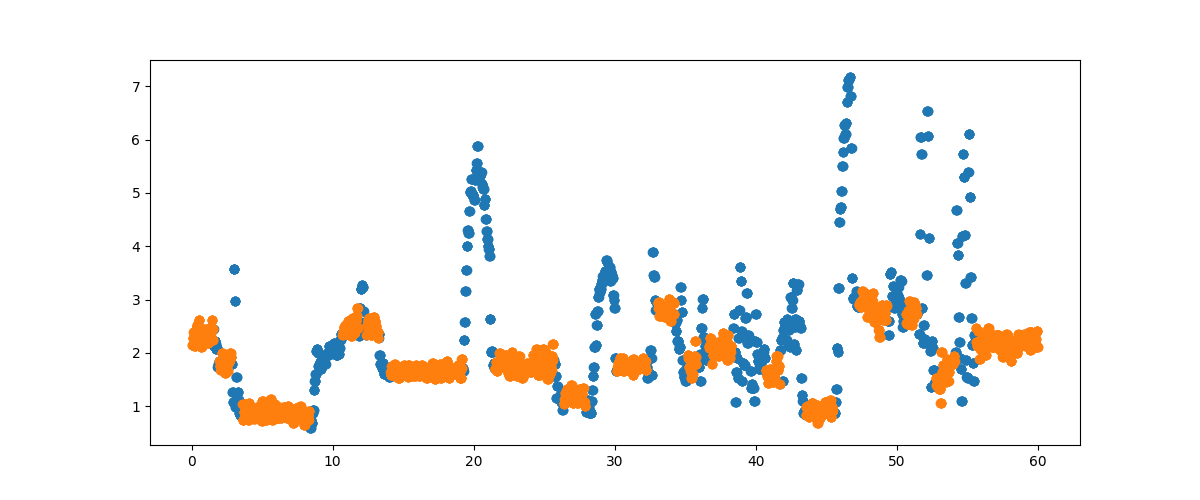

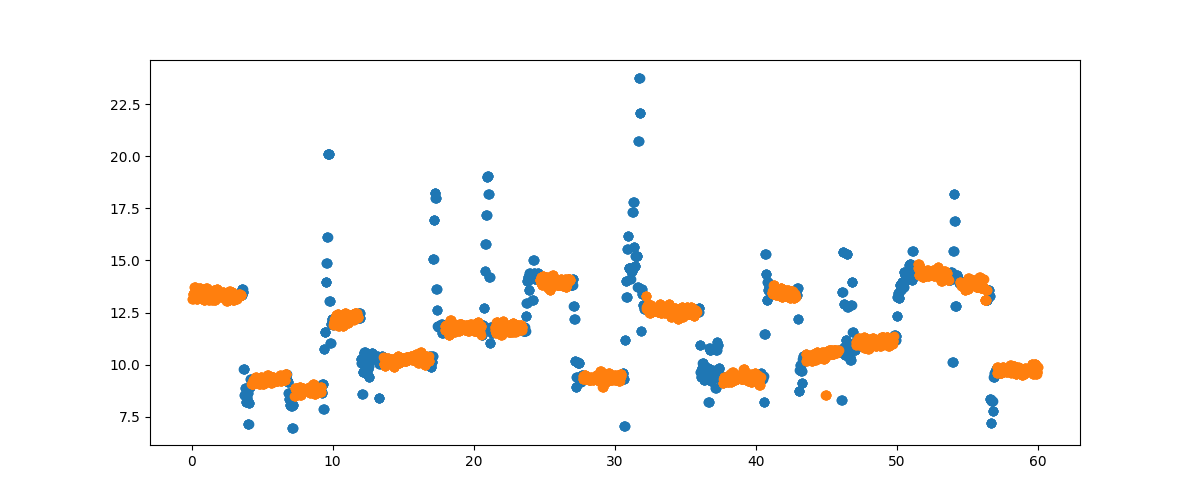

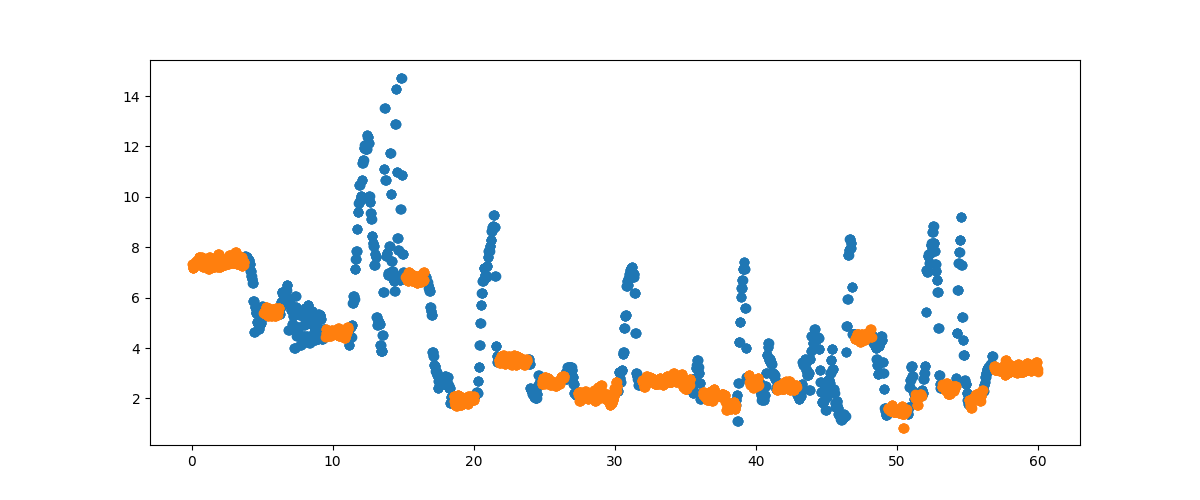

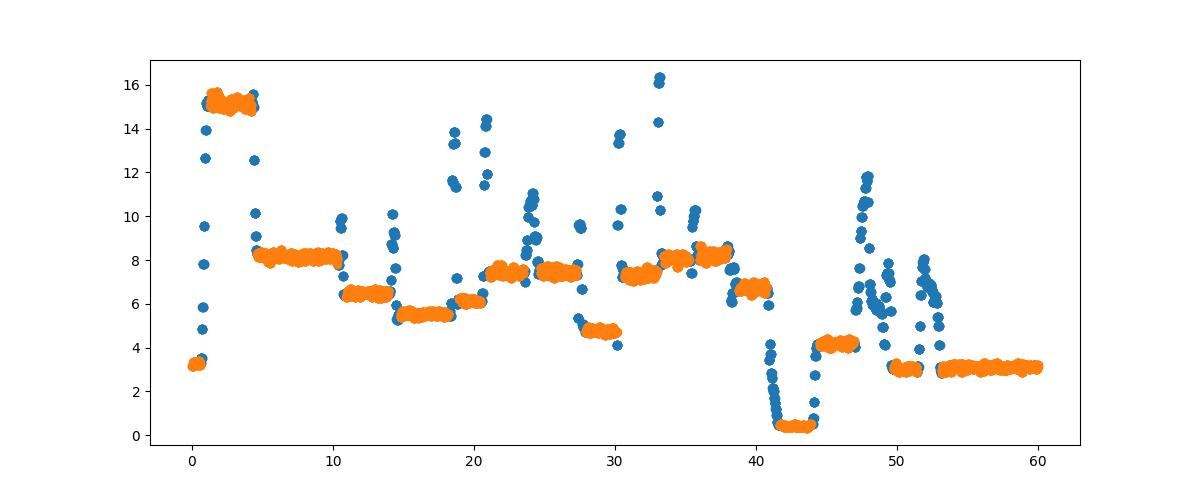

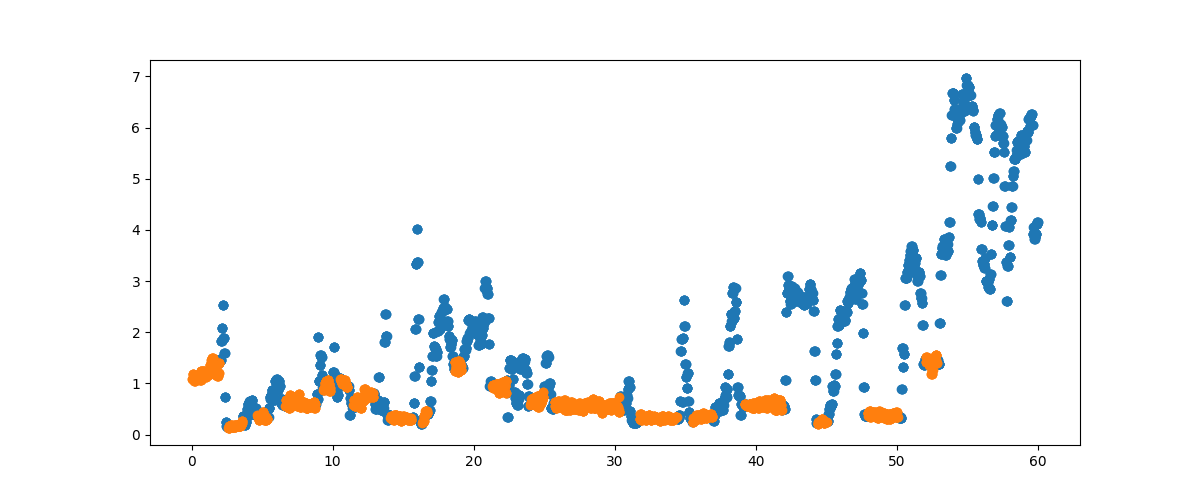

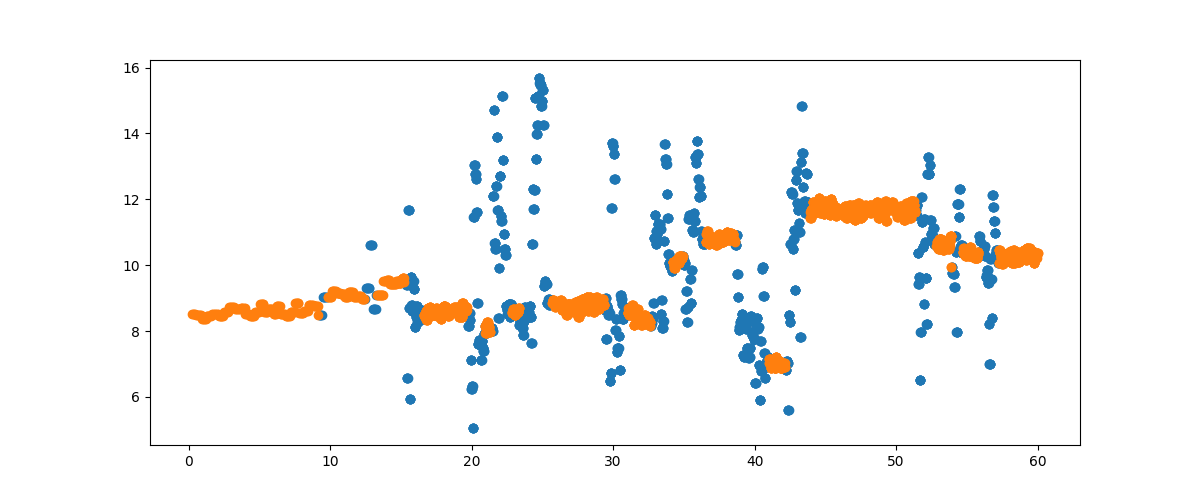

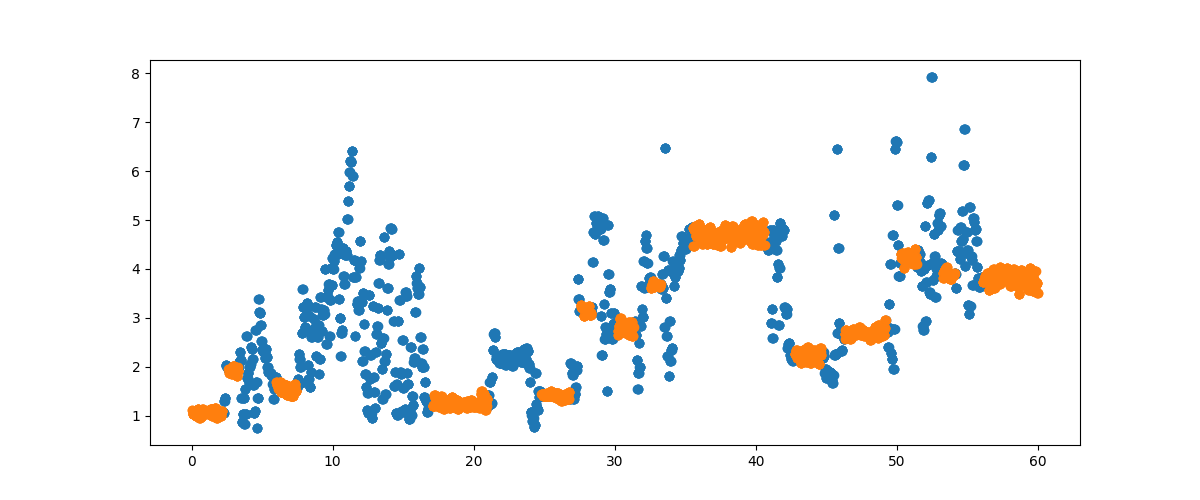

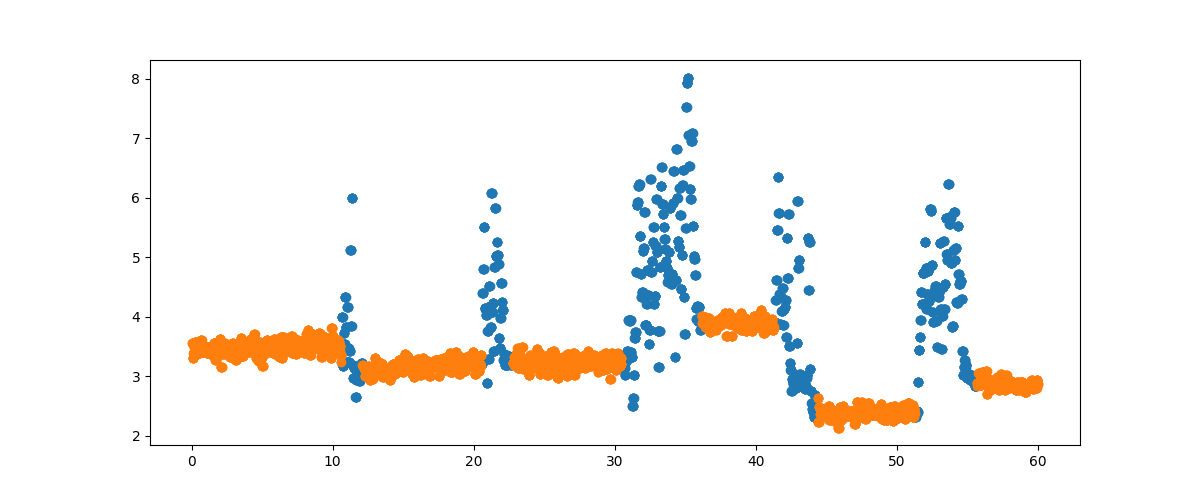

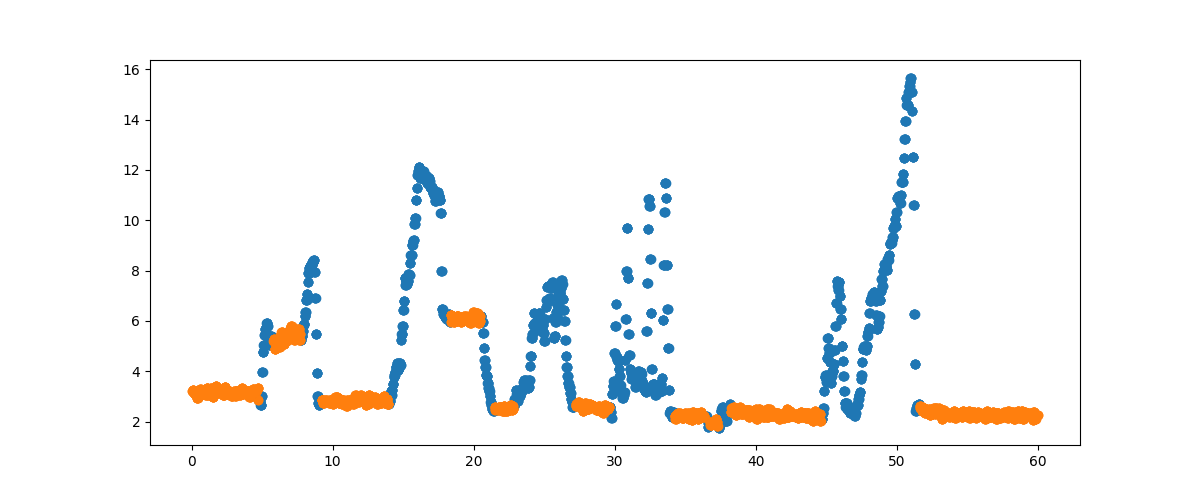

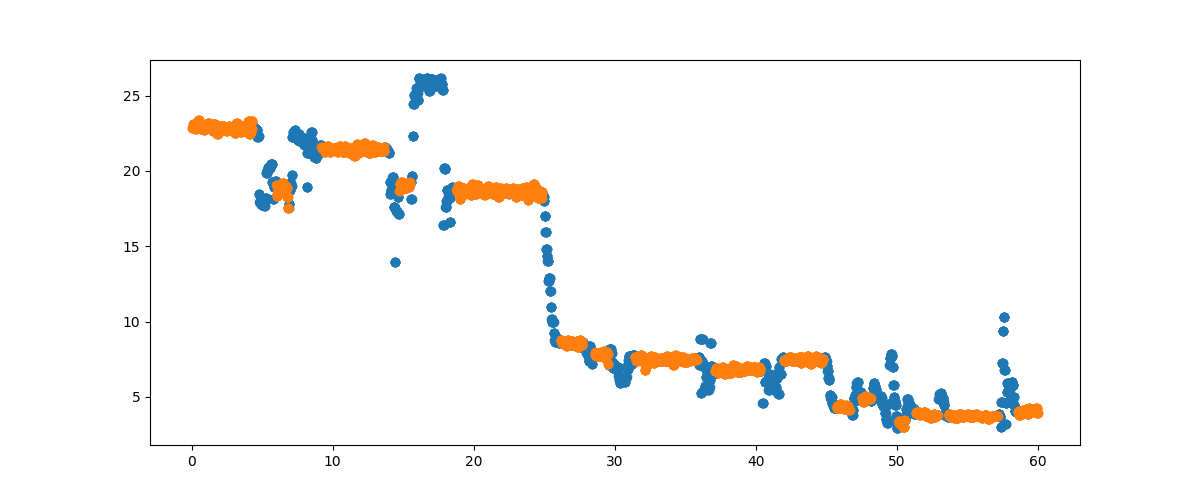

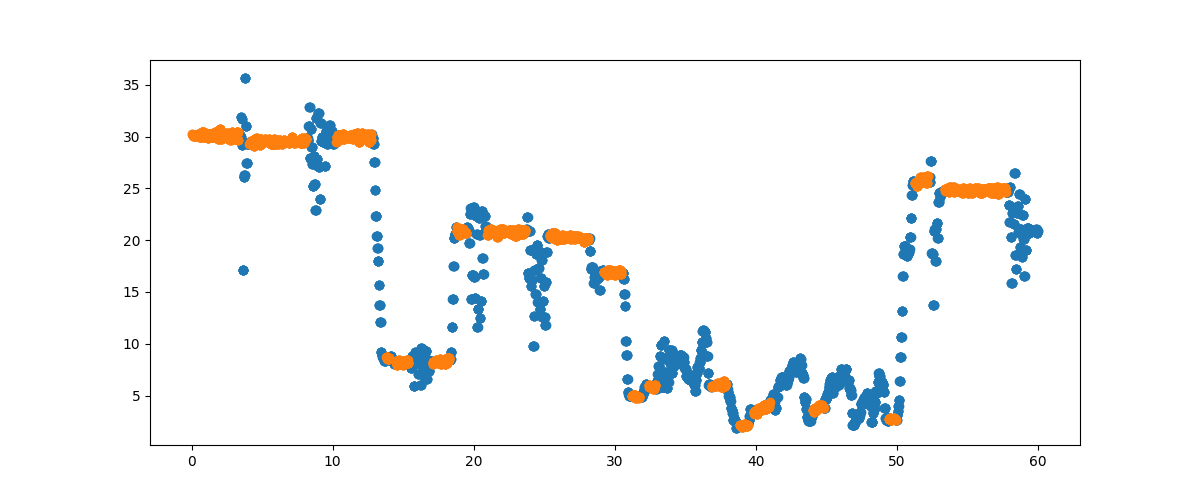

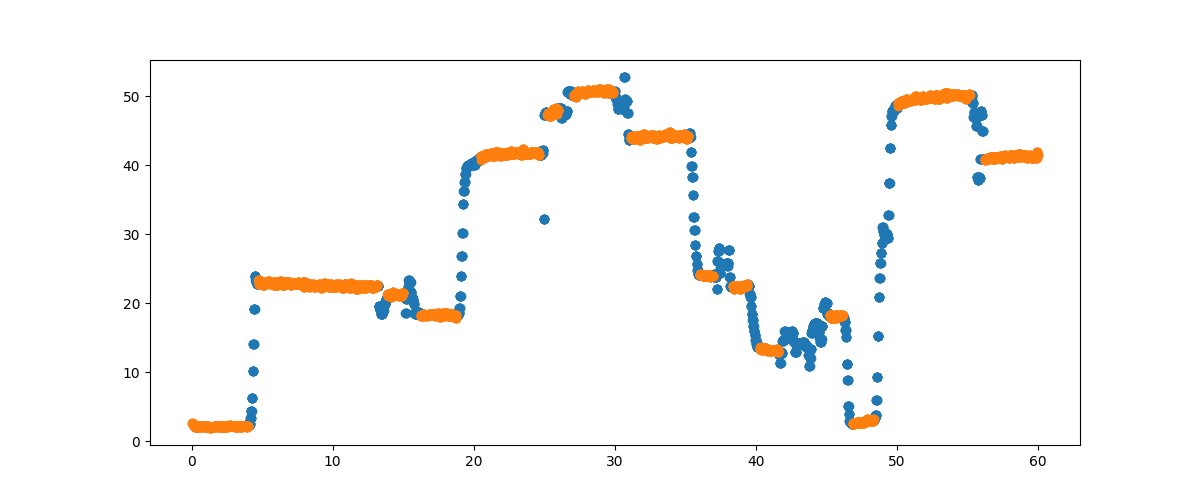

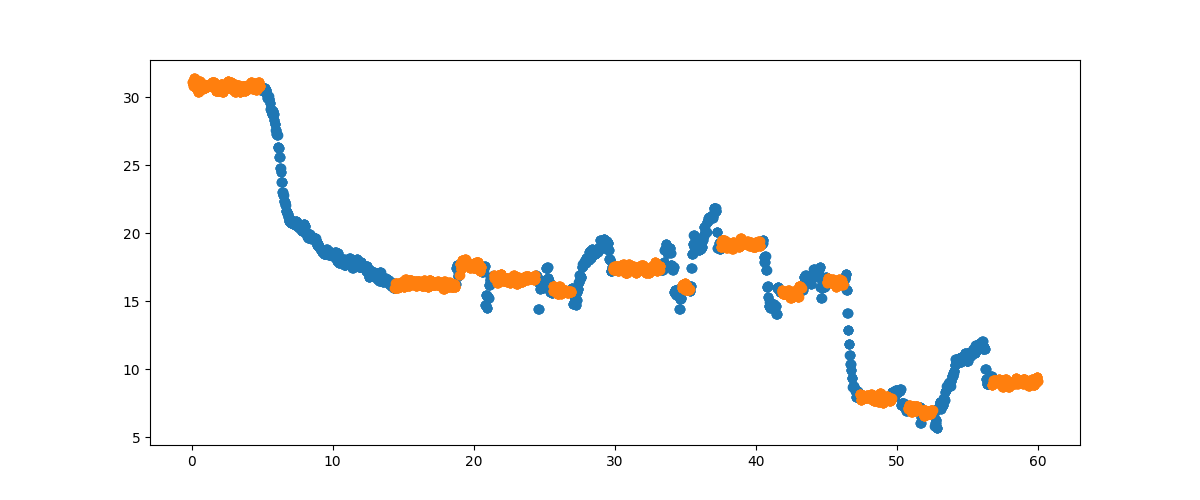

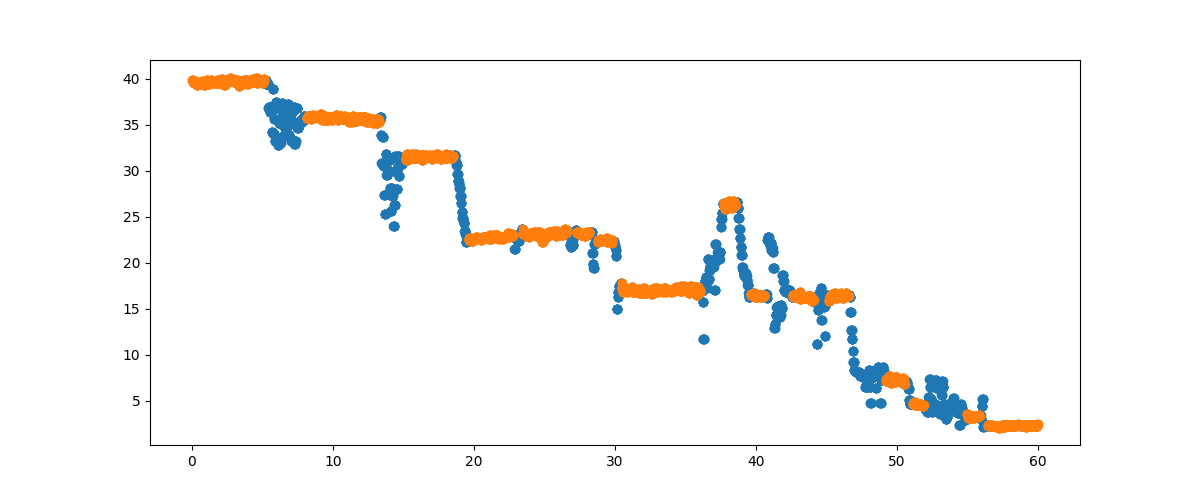

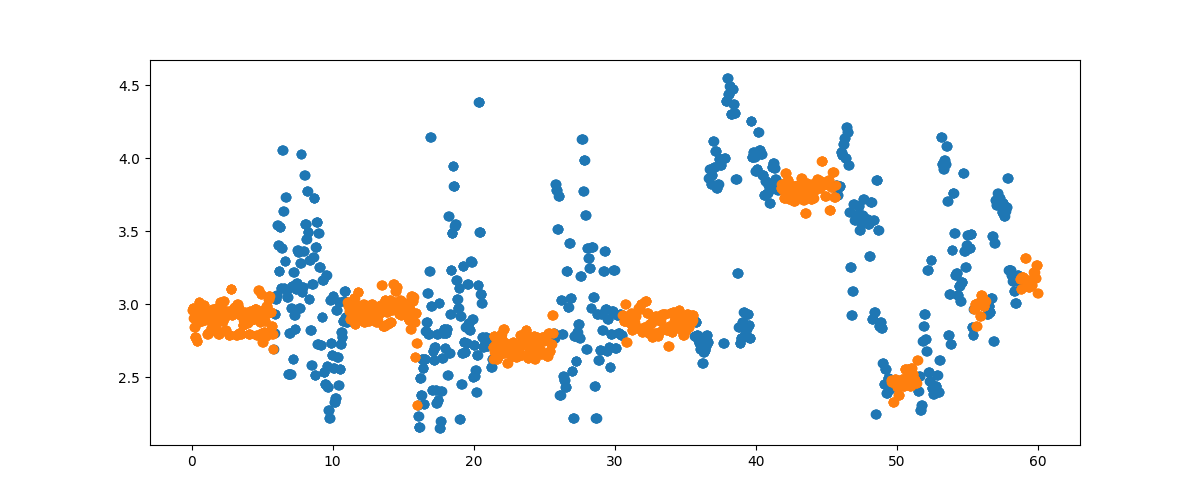

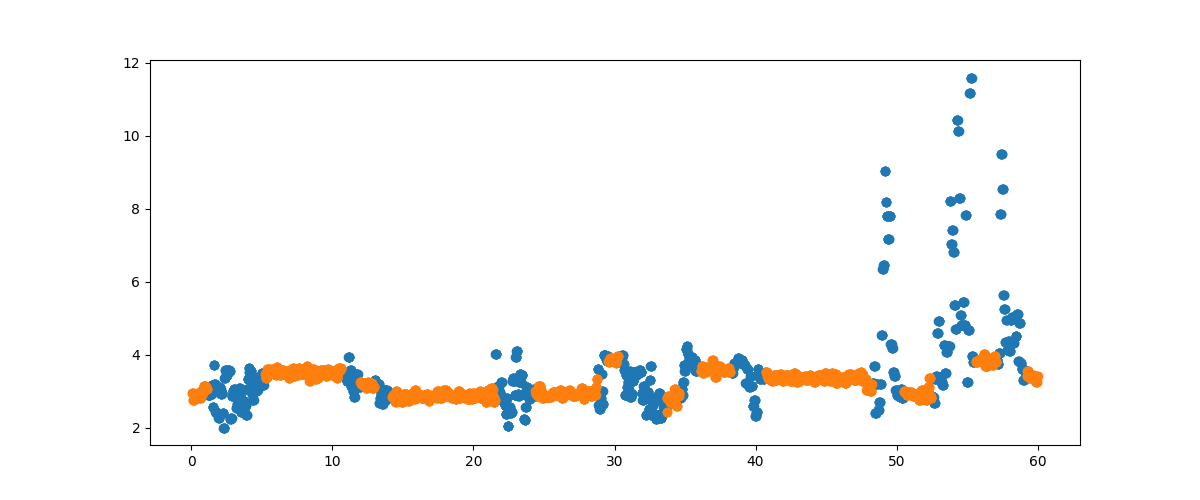

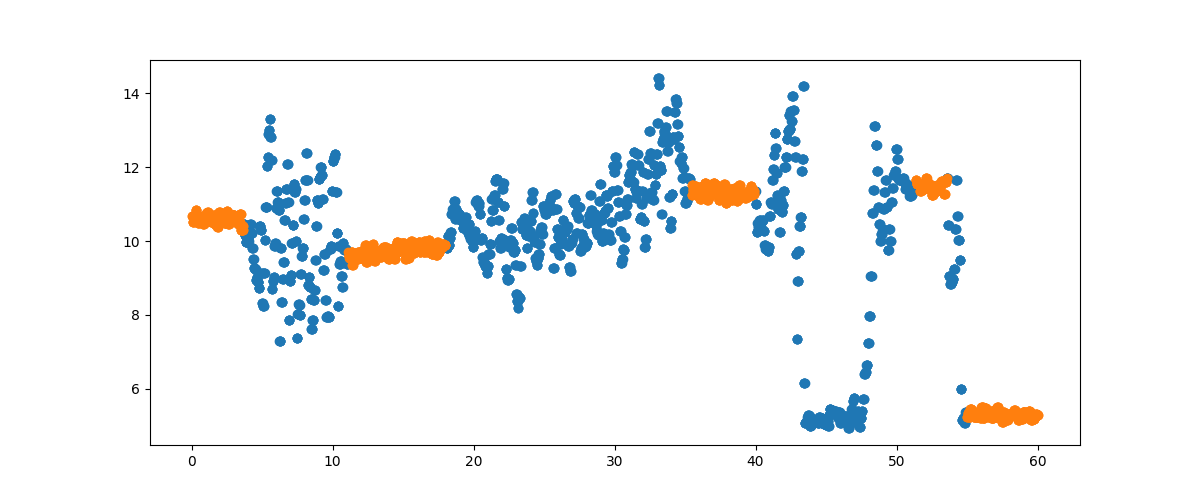

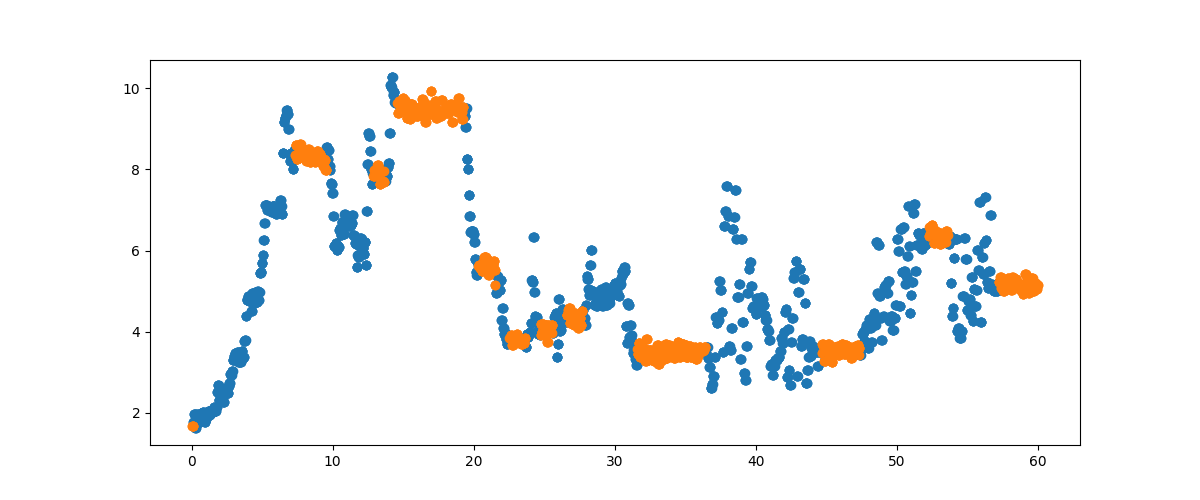

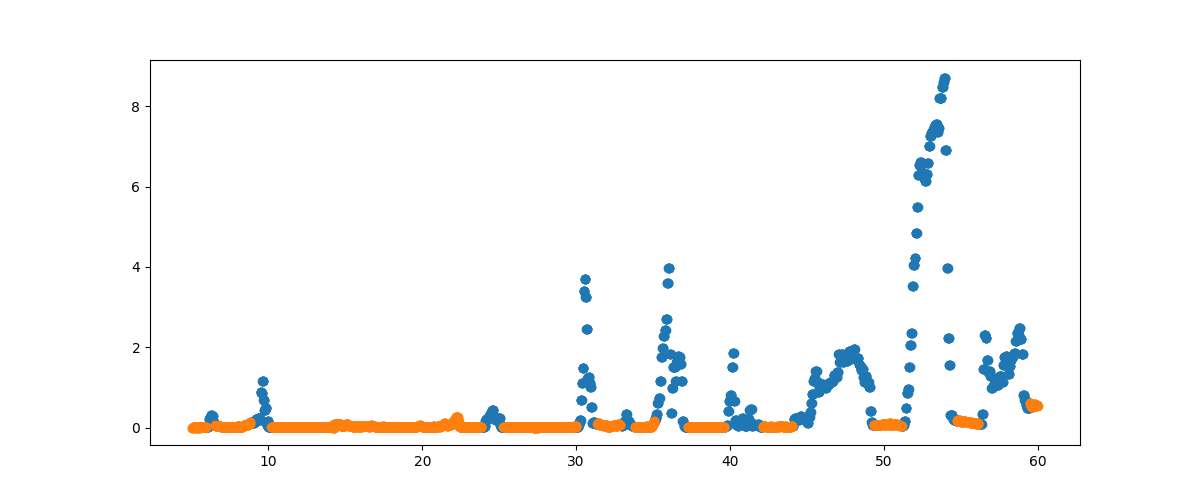

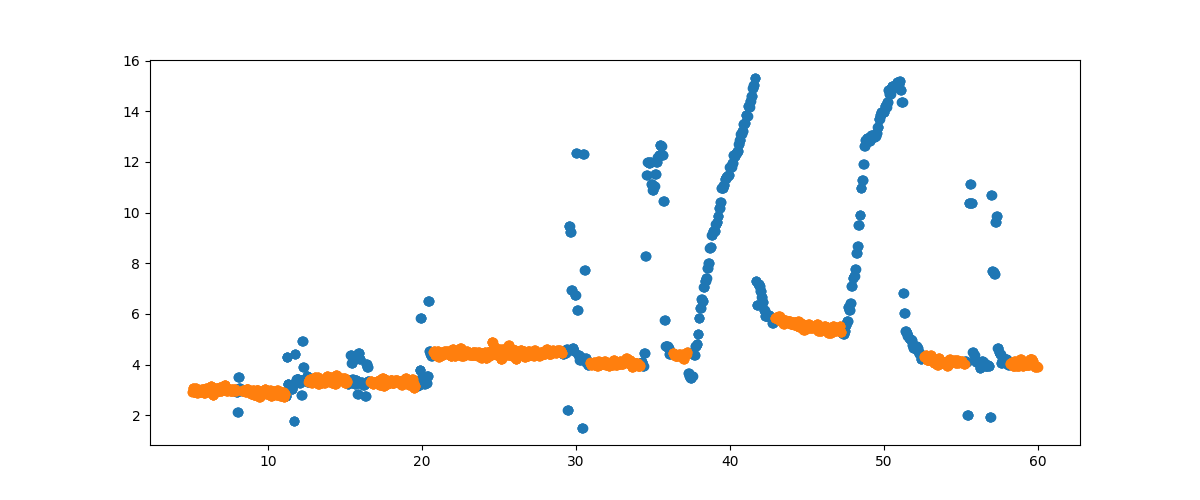

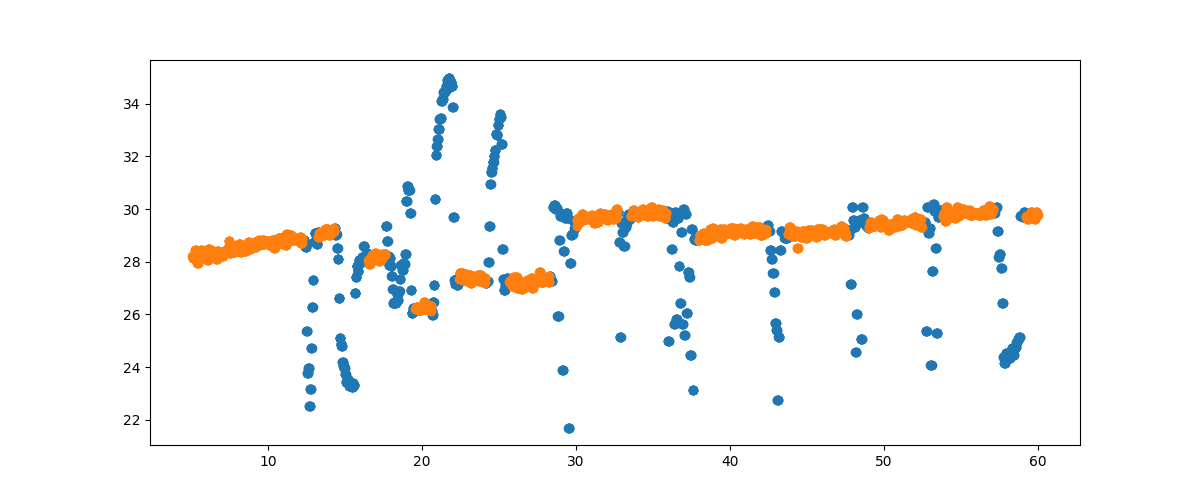

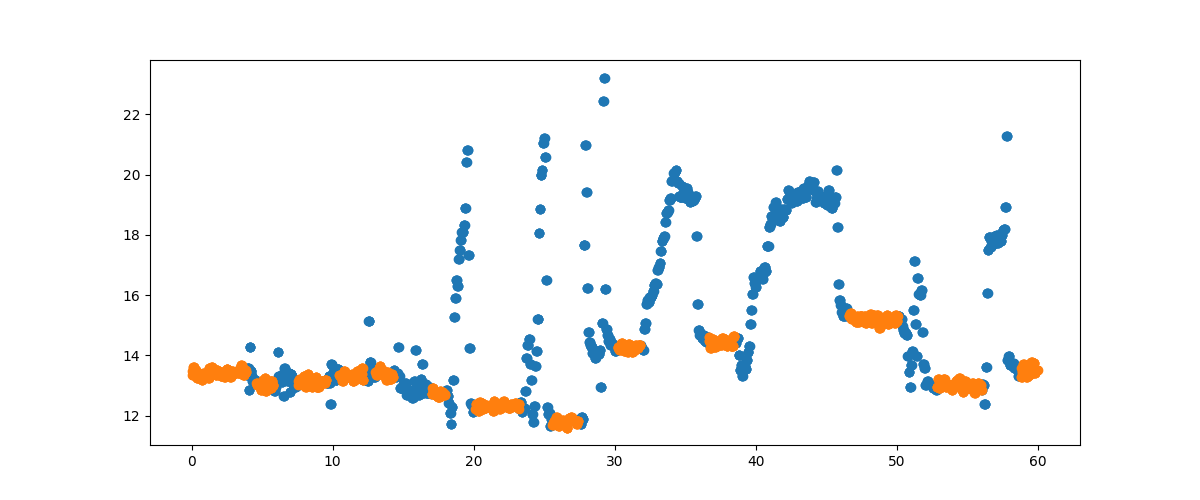

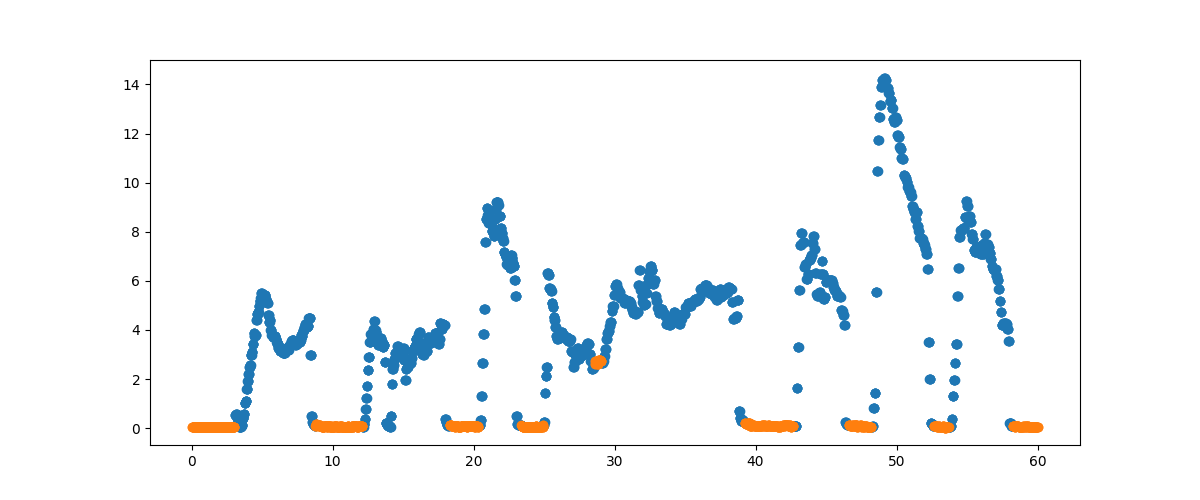

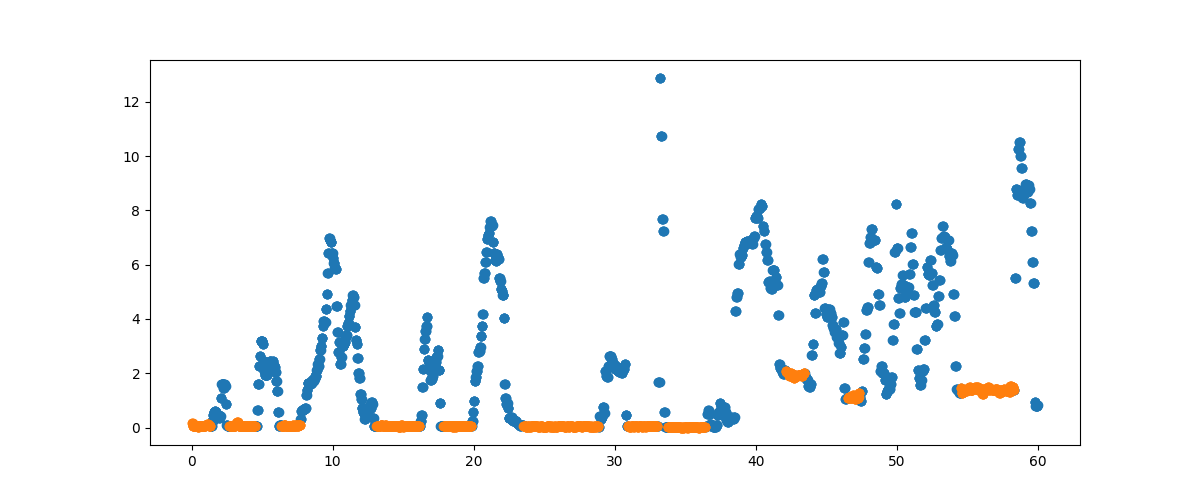

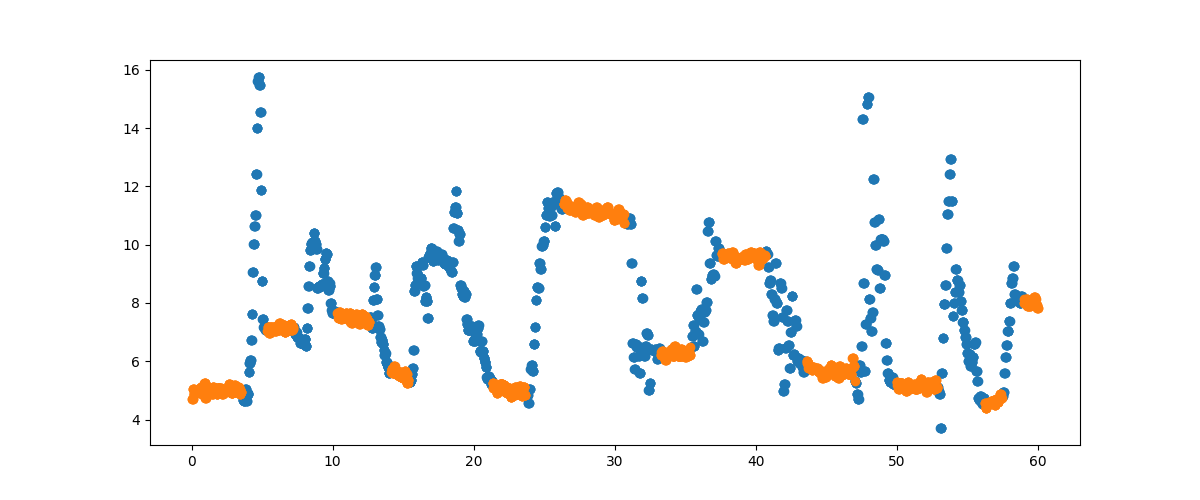

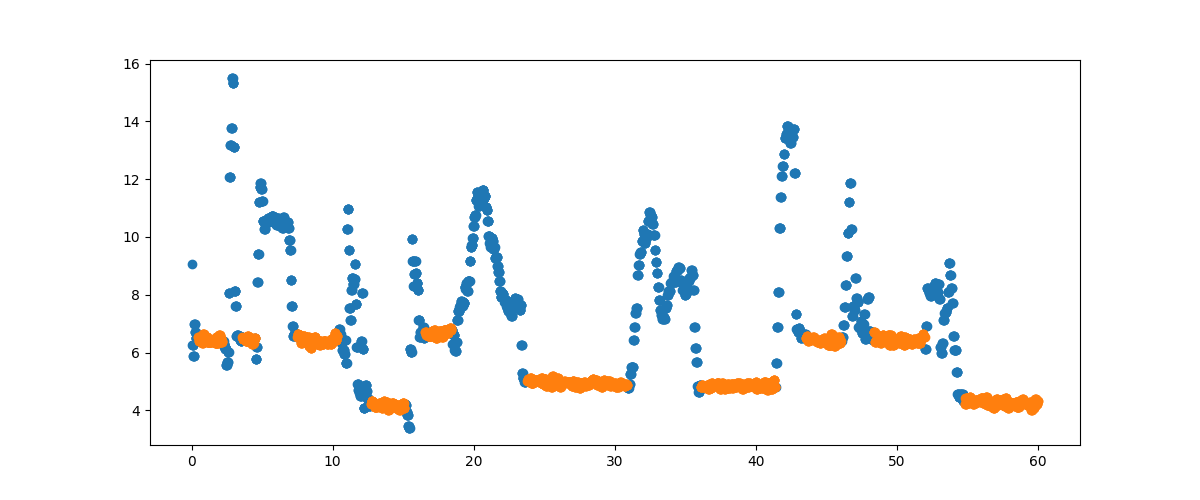

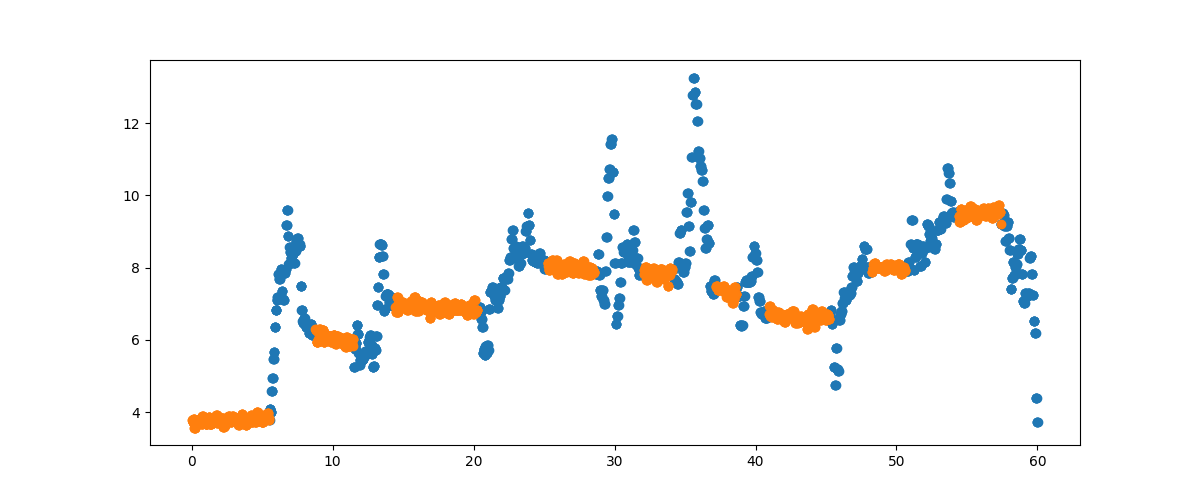

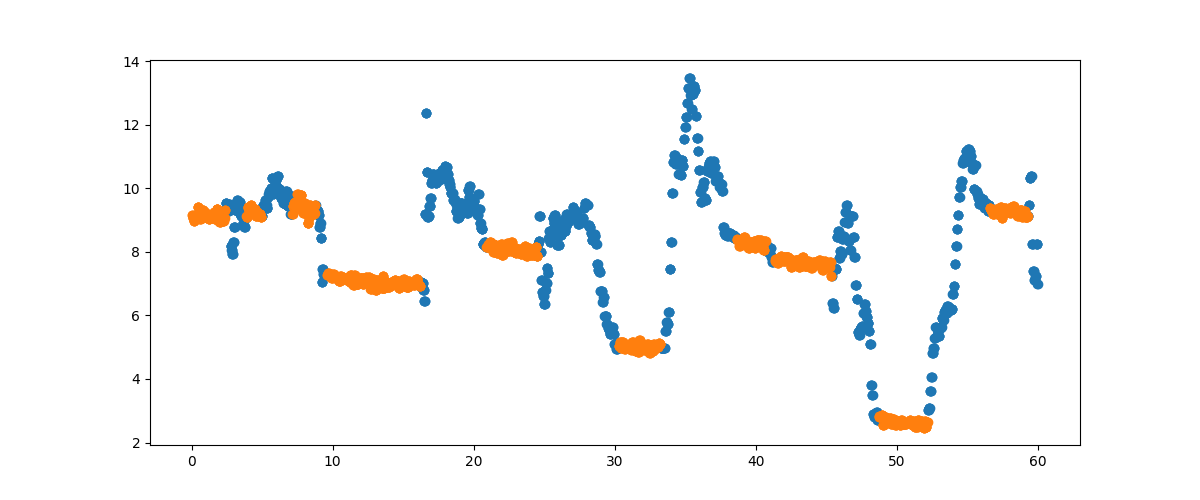

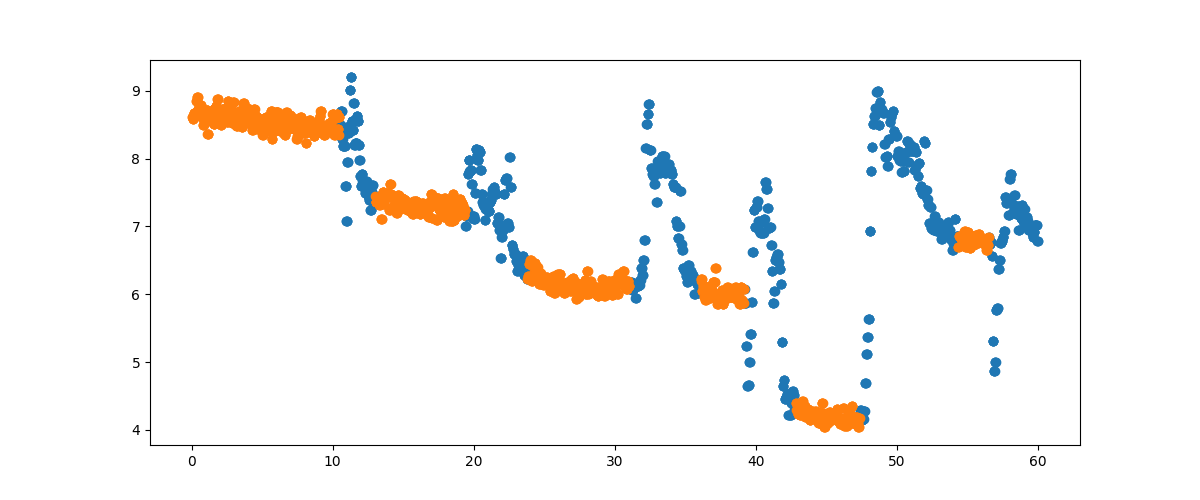

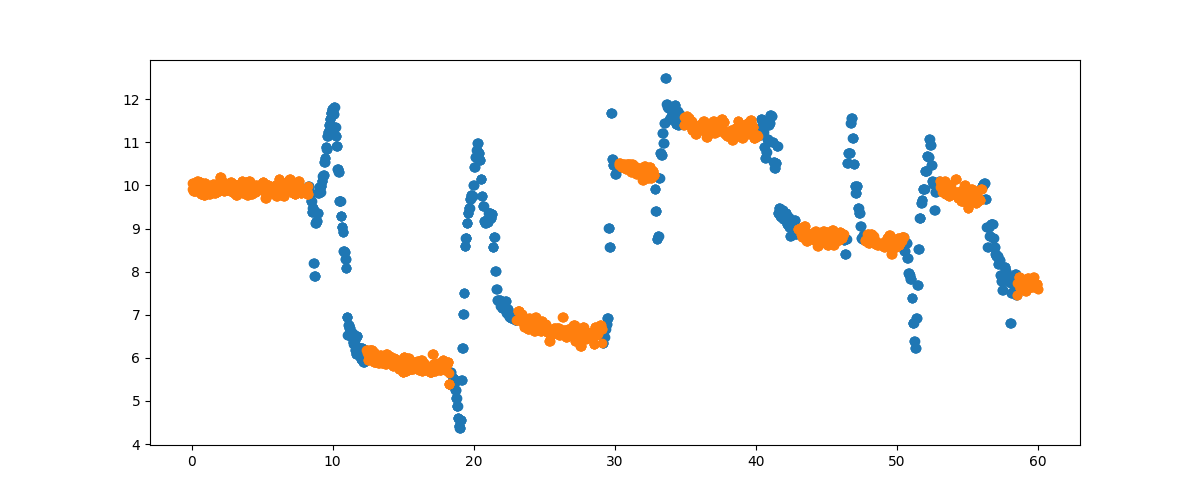

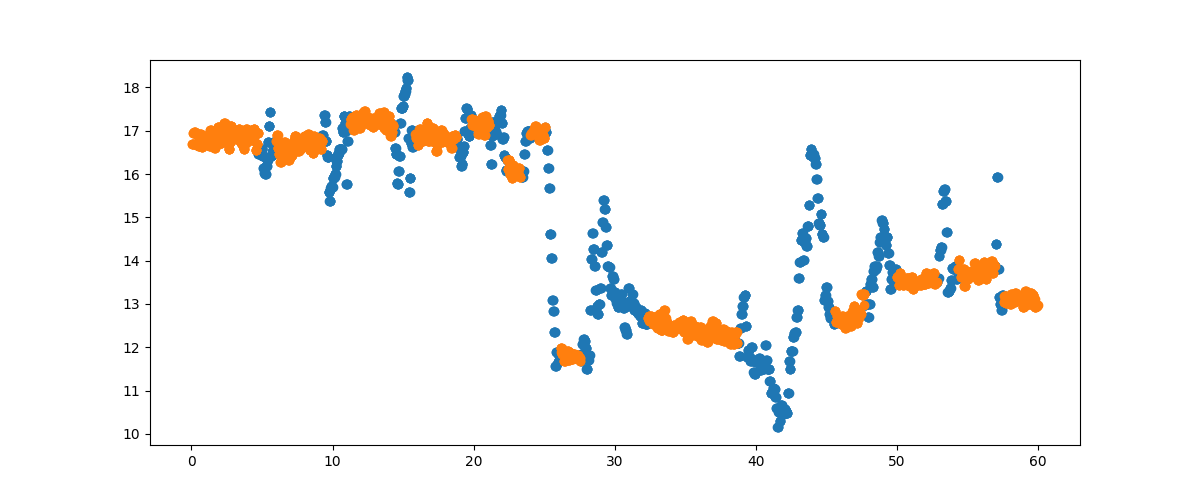

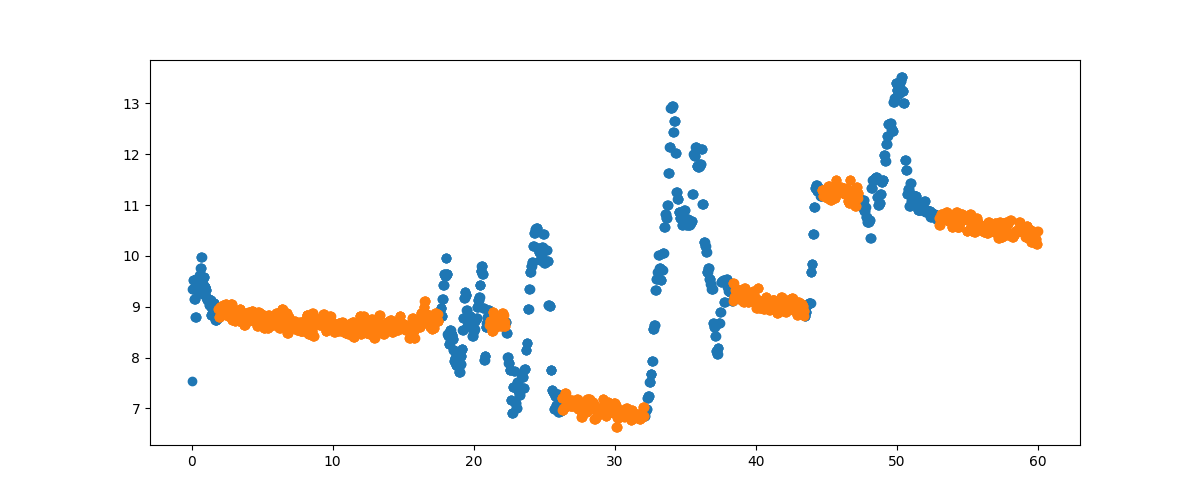

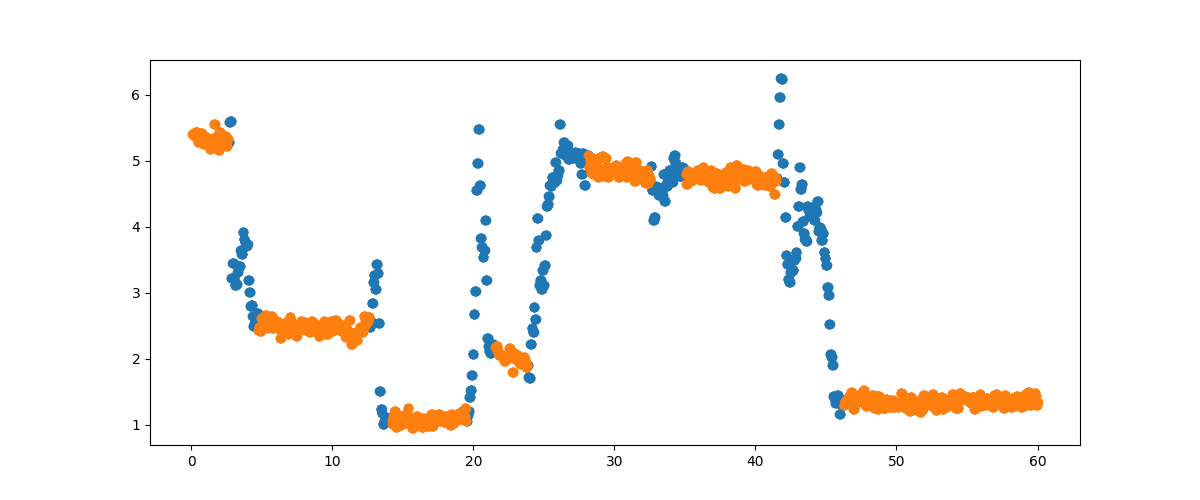

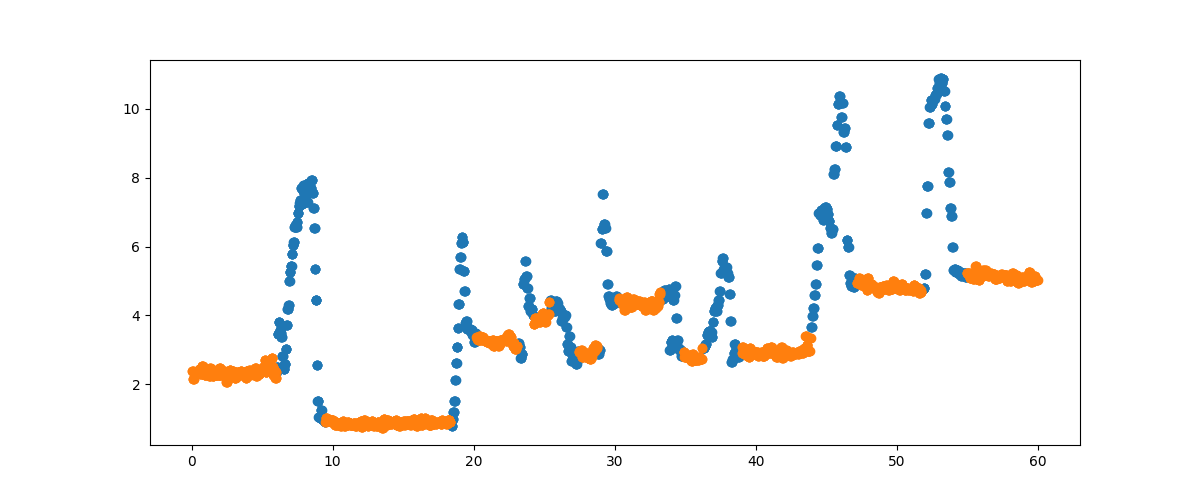

In [341]:
for i in range(1,41):
    df = pd.read_csv(f"dataset_slippage/clean/clean_sample_{i}.csv")
    plt.figure()
    slipped_df = df[df["label"]=="slipped"]
    static_df = df[df["label"]=="static"]
    plt.scatter(slipped_df["time"], slipped_df["mag"])
    plt.scatter(static_df["time"], static_df["mag"])

In [334]:
# cada vez que se detecte slippage, despues de ajusatr el gripper
# resetear el contexto(aplicar un sleep de 1 segundo donde se capturan nuevas muestras del sensor) 
# de esta manera evitamos que el detector no se active infinitiamente